# Remake of the example competition behaviours

In [21]:
include("simu_dual_utils.jl")
pyplot()
using LaTeXStrings    # for plot labels, etc.
using JLD2
using Random

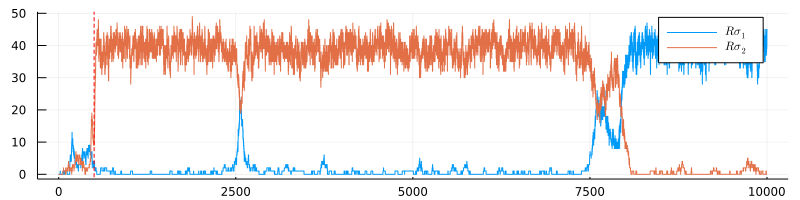

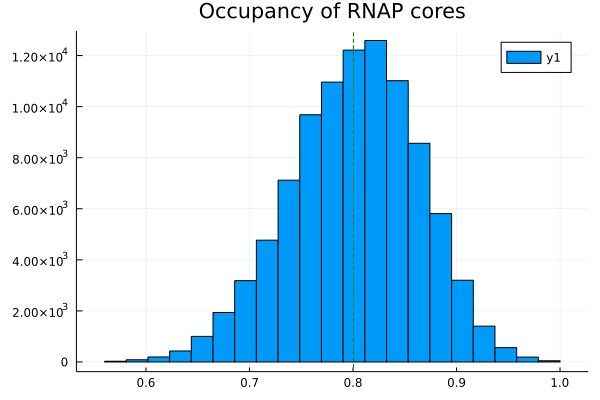

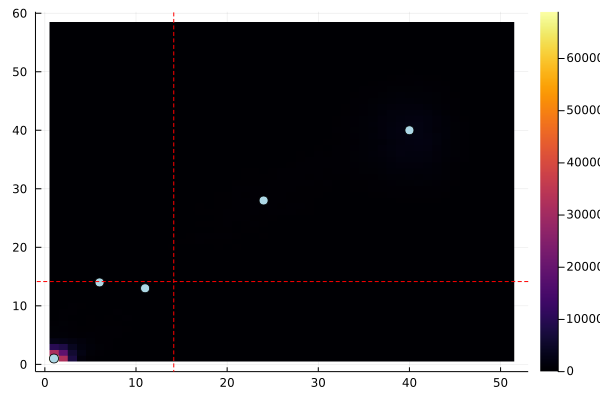

# fp: 2, # fp below noise level: 1, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: het_activation
het_activation


In [69]:
# set random seeds for reproducibility
Random.seed!(7777)

# settings
stress_t = 500.
dt = 0.2
# parameters
β = 50.0
n₁ = 3.0
n₂ = 3.0
Rₜ = 50    # total number of RNAP core

k₂ = 0.05    # k_off
k₁ = k₂ / 10    # k_on = k_off / K_d

# KS = 5.0    # stochastic switching
# rK = 0.8
# KS = 2.0    # stochastic pulsing
# rK = 0.1
# KS = 1.0    # concurrent activation
# rK = 3.0
KS = 8.0    # exlusive activation
rK = 2.0

# define the system
network = duo_ts_system()

# simulation
sol = simu_duo_ts_all(network,
    _KS₁ = KS, _rK₁ = rK, 
    _KS₂ = KS, _rK₂ = rK,   # same
    _n₁ = n₁, _n₂ = n₂,
    _Rₜ = Rₜ, 
    _k₁₁ = k₁, _k₂₁ = k₂, 
    _k₁₂ = k₁, _k₂₂ = k₂,
    _β₁ = β, _β₂ = β, _τ₁ = 10.0, _rτ = 5.0, _v₀ = 1e-2,
    max_t = 1e5, stress_t = stress_t, saveat = dt,
    quiet = true);    # block any plots by default

# select molecules
t, v₁, v₂ = interpret_sol(select_species(sol, [6, 7]))

pl = 50000
# plot
plot(t[1:pl], v₁[1:pl], label = L"R\sigma_1")
plot!(t[1:pl], v₂[1:pl], label = L"R\sigma_2")
plot!([stress_t], seriestype = "vline", color = "red", 
        linestyle = :dash, labels = :none)
plot!(size = (800, 200)) |> display

# # plot another one
# t, v₁, v₂ = interpret_sol(select_species(sol, [1, 3]))
# plot(t[1:pl], v₁[1:pl], label = L"\sigma_1")
# plot!(t[1:pl], v₂[1:pl], label = L"\sigma_2")
# plot!([stress_t], seriestype = "vline", color = "red", 
#         linestyle = :dash, labels = :none)
# plot!(size = (800, 200)) |> display

# # plot yet another one
# t, v₁, v₂ = interpret_sol(select_species(sol, [6, 2]))
# plot(t[1:pl], v₁[1:pl], label = L"R\sigma_1")
# plot!(t[1:pl], v₂[1:pl], label = L"A_1")
# plot!([stress_t], seriestype = "vline", color = "red", 
#         linestyle = :dash, labels = :none)
# plot!(size = (800, 200)) |> display

# plot the occupation ratio of RNAP cores
~, ~, R = interpret_sol(select_species(sol, [4, 5]))
X = 1 .- R[5000:100000] / Rₜ
bins = Int64(maximum(R[5000:100000]))
histogram(X, bins = range(minimum(X), stop = maximum(X), length = bins),
    title = "Occupancy of RNAP cores")
plot!([mean(X)], seriestype = "vline", color = :green,
    linestyle = :dash, label = :none) |> display

# classification
regime = classify_by_timetraj(
    select_species(sol, [6, 2]), stress_t, dt, β, 1.0,
    thres_v = 0.0015,
    quiet = false, show_p_heatmap = true)
println(regime)

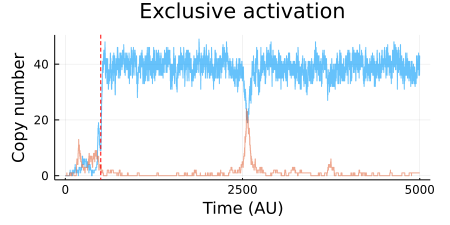

In [70]:
gr()
max_plot_t = 5000.
from = 1
to = Int64(max_plot_t / dt)

# select molecules
t, v₁, v₂ = interpret_sol(select_species(sol, [6, 7]))

plot(t[from:to], v₂[from:to], label = L"E\sigma_1", alpha = 0.6)
plot!(t[from:to], v₁[from:to], label = L"E\sigma_2", alpha = 0.6)
plot!([stress_t], seriestype = "vline", color = "red", 
        linestyle = :dash, labels = :none)
plot!(size = (450, 225))
plot!(xlabel = "Time (AU)", ylabel = "Copy number")
plot!(title = "Exclusive activation")
plot!(xticks = ([0, 2500, 5000], [0, 2500, 5000]),
    yticks = ([0, 20, 40], [0, 20, 40]))
plot!(legend = :none)
plot!(margin = 3Plots.mm)    # lest the axis labels be truncated
# plot!(xticks = :none, xlabel = "")

In [71]:
savefig("figures/example_comp_traj_excl_activation.pdf")